# **Parts Recognition**

## **Import Libraries and Dataset**

In [1]:
import os
import h5py
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read the h5 dataset

with h5py.File('dataset.h5', 'r') as hdf:
    images = np.array(hdf['Objects'])
    labels = np.array(hdf['Labels'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_18244\3572317518.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  images = np.array(hdf['Objects'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_18244\3572317518.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  labels = np.array(hdf['Labels'])


In [3]:
# Retrieve info for number of images/samples, height, width, and the color channels
n_samples, height, width, n_channels = images.shape

# Flatten all of the images
images_flat = images.reshape((n_samples, height * width * n_channels))

# Split the dataset into two sets: Training (60%) and Testing (40%)
X_train, X_test, y_train, y_test = train_test_split(images_flat, labels, test_size=0.4, random_state=42)

In [4]:
# Inspect the shape of both training and test sets

print("Shape of X train:", X_train.shape)
print("Shape of X test :", X_test.shape, '\n')

print("Shape of y train:", y_train.shape)
print("Shape of y test :", y_test.shape)

Shape of X train: (173, 1125000)
Shape of X test : (116, 1125000) 

Shape of y train: (173,)
Shape of y test : (116,)


## **Images of Training and Testing Set**

In [5]:
def display_images(images, labels, title, num_columns=10):
    num_images = len(images)
    num_rows = (num_images // num_columns) + 1

    plt.figure(figsize=(20, num_rows * 2))
    
    for i in range(num_images):
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    
    plt.suptitle(title)
    plt.show()

### **Training Set**

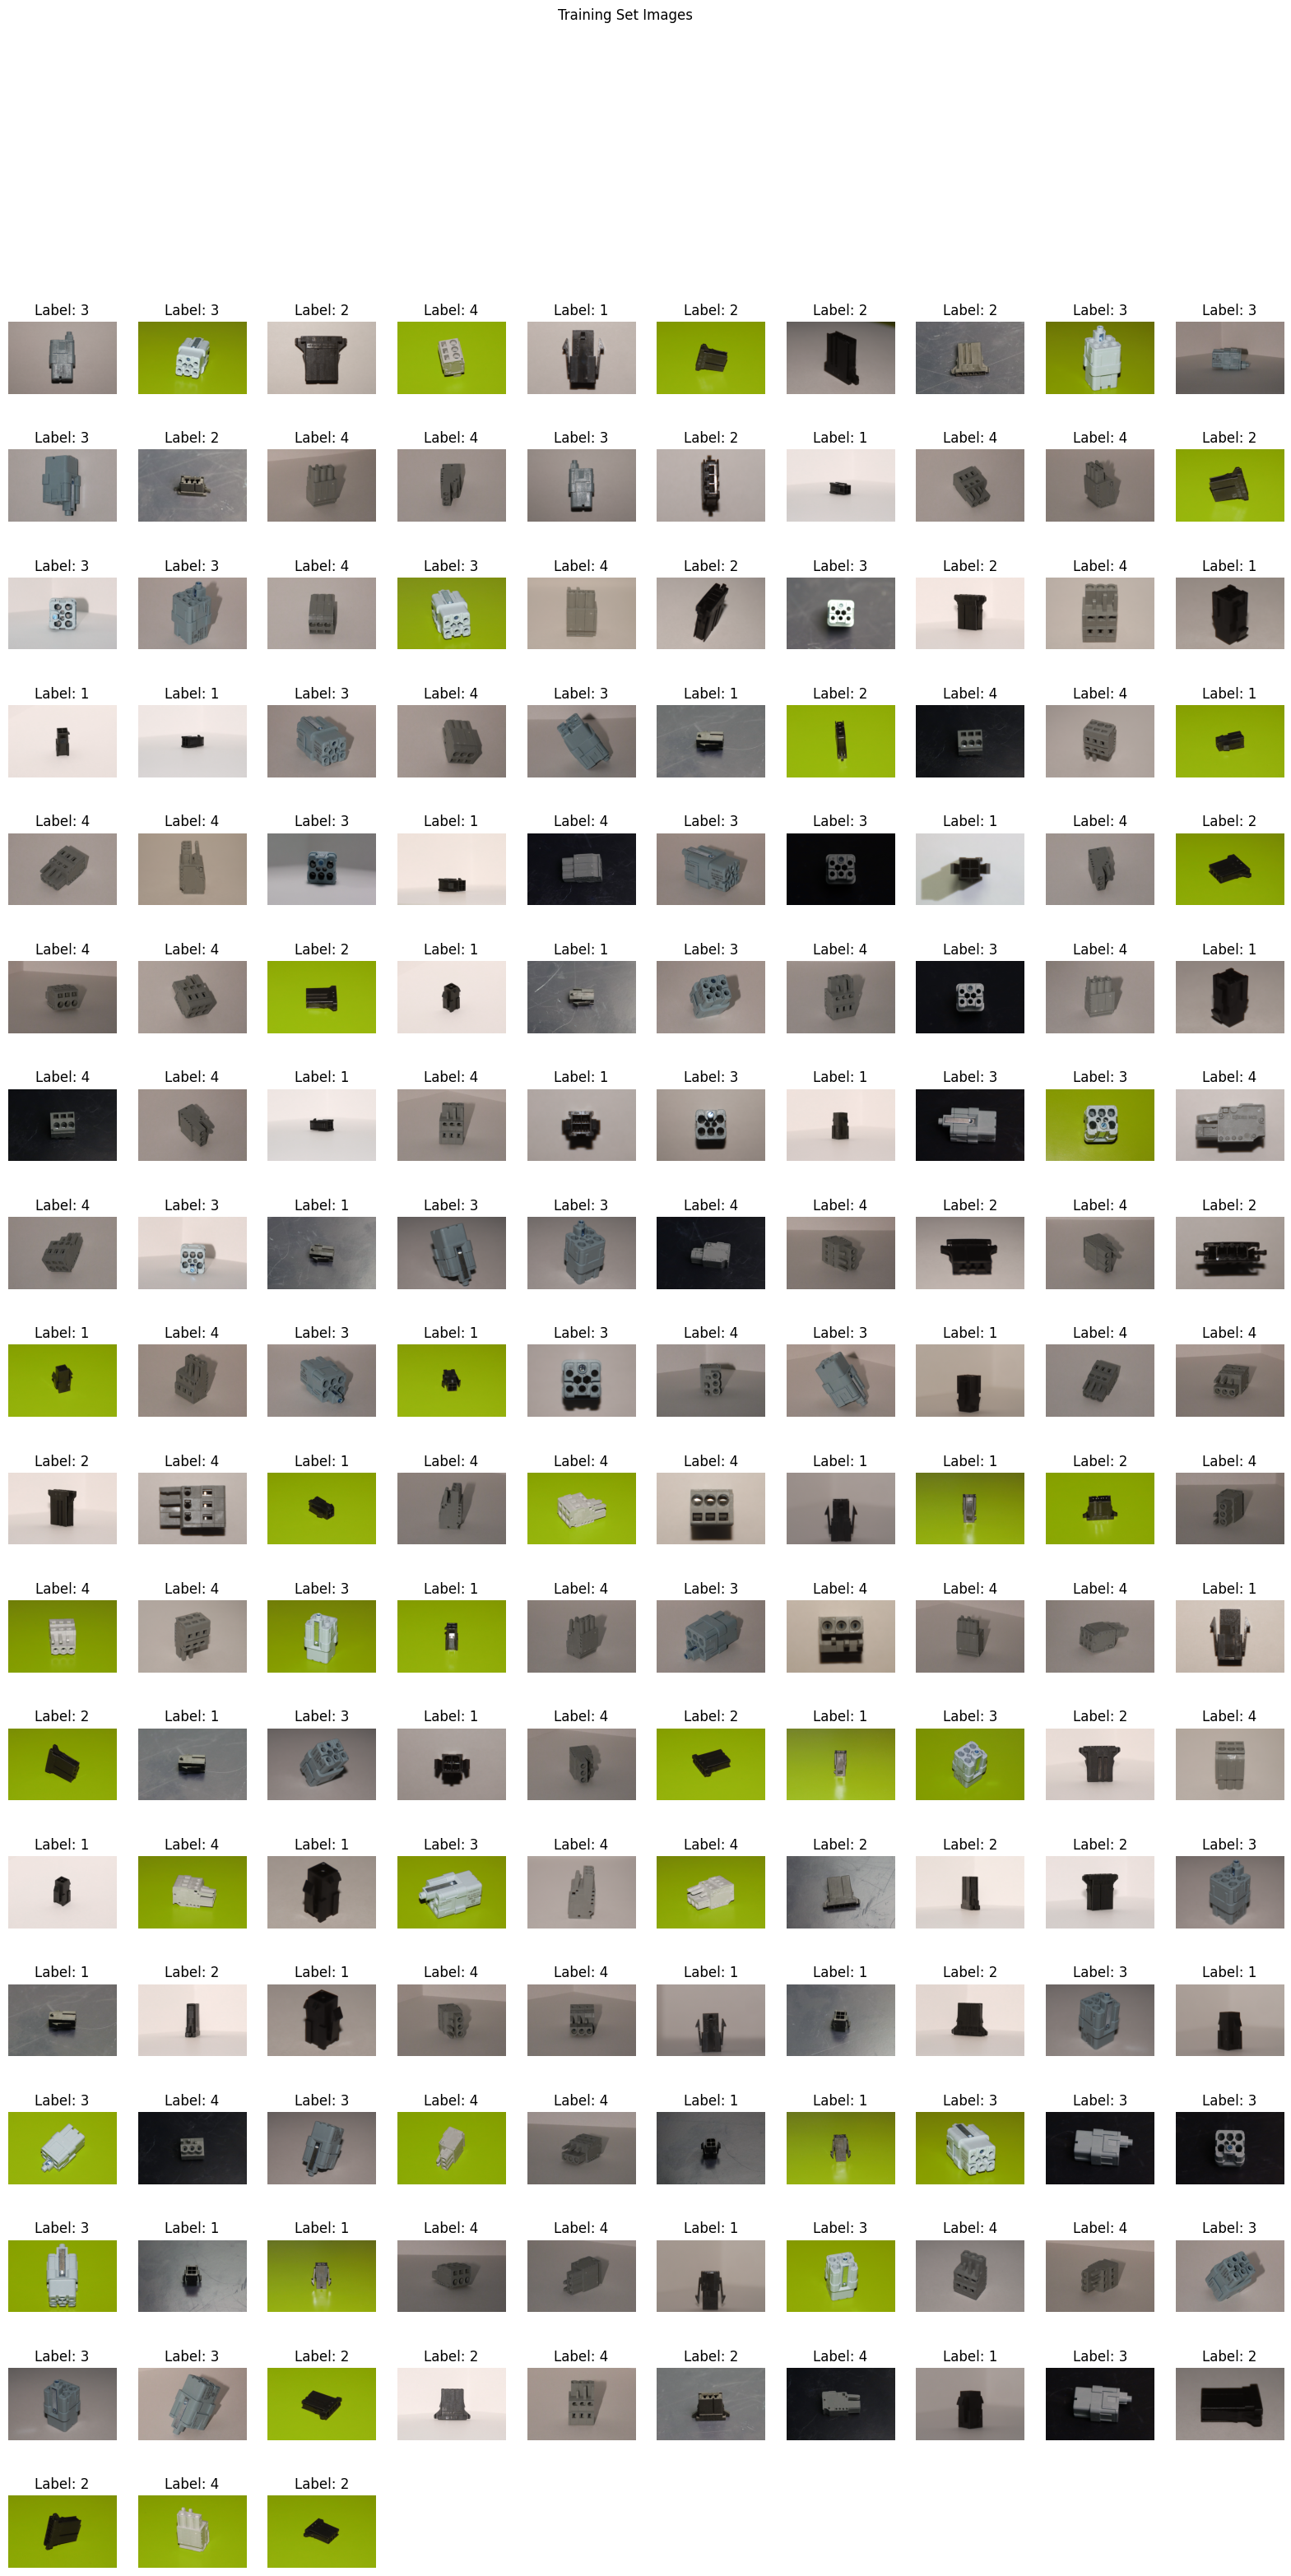

In [6]:
X_train_images = X_train[:, :height * width * n_channels].reshape(-1, height, width, n_channels)
display_images(X_train_images, y_train, "Training Set Images")

### **Testing Set**

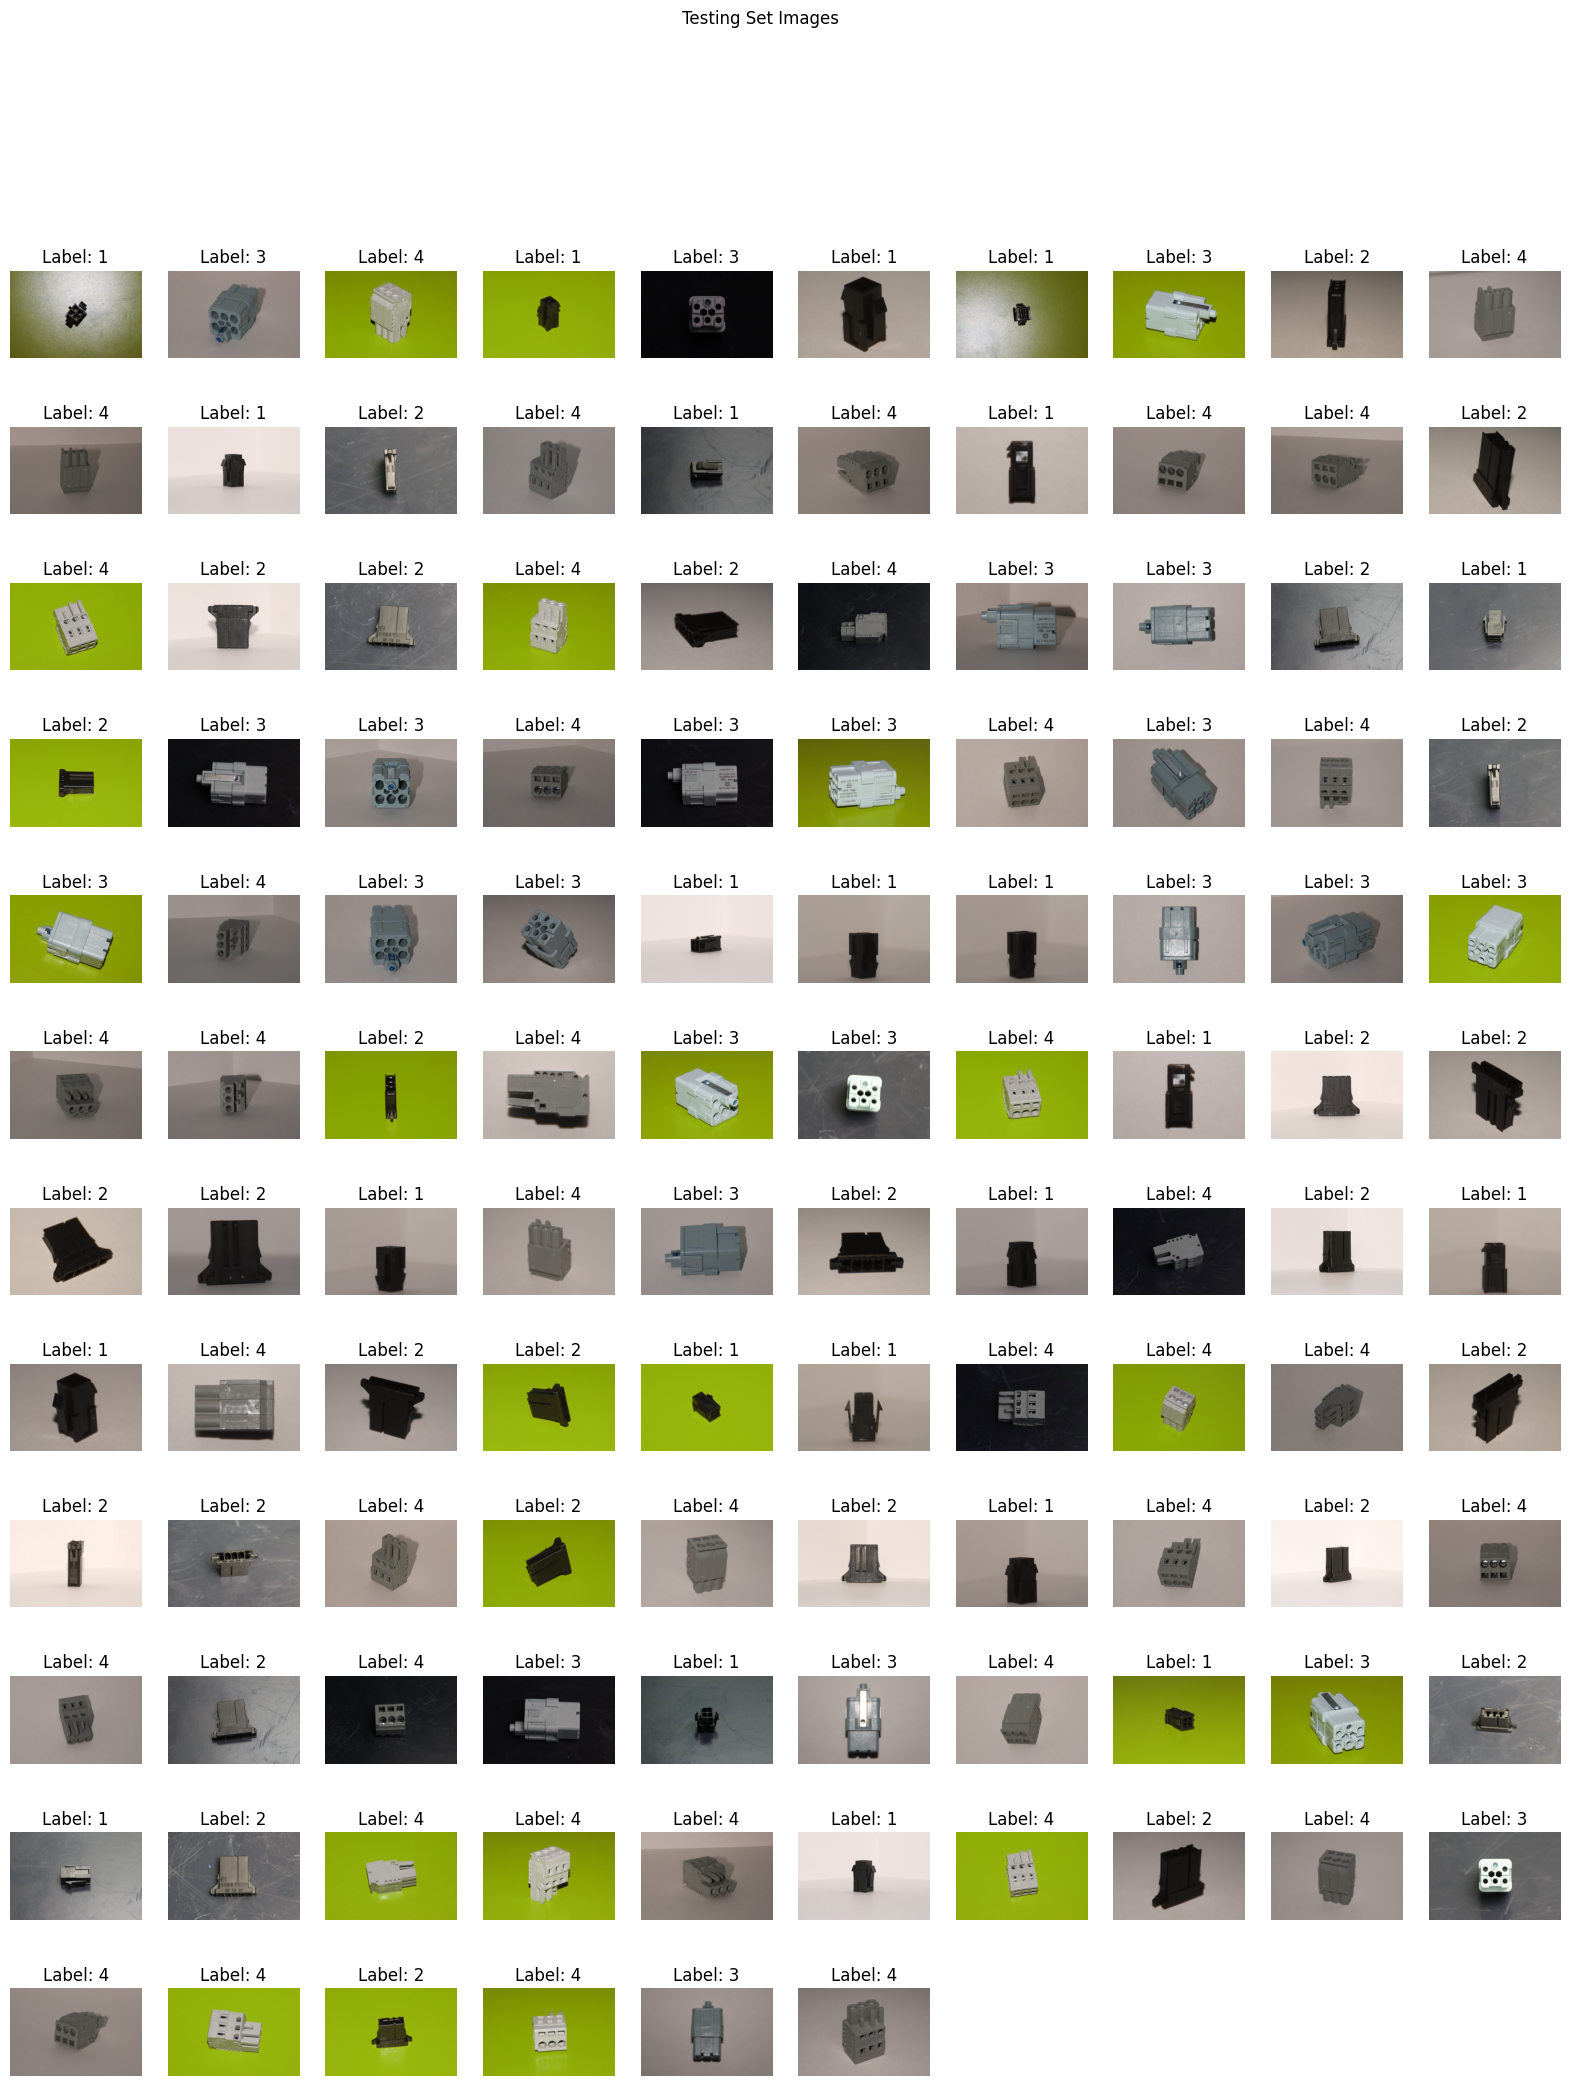

In [7]:
X_test_images = X_test[:, :height * width * n_channels].reshape(-1, height, width, n_channels)
display_images(X_test_images, y_test, "Testing Set Images")

## **Feature Extraction**

### **Principal Component Analysis (PCA)**

In [8]:
# Load PCA and preserve 22 features from the images
pca = PCA(n_components=22)

# Fit the X_train into PCA for training 
pca.fit(X_train)

# Transform the training and test sets
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
# Inspect the shape of both training and test sets after PCA

print("Shape of X train after PCA:", X_train_pca.shape)
print("Shape of X test after PCA:", X_test_pca.shape)

Shape of X train after PCA: (173, 22)
Shape of X test after PCA: (116, 22)


## **Machine Learning Prediction**

### **Support Vector Machine (SVM)**

In [10]:
#Load SVM Classifier w/ linear kernel
svm = SVC(kernel='linear', random_state=42)

# Fit the transformed X_train and y_train into model
svm.fit(X_train_pca, y_train)

# PREDICTION !!!
y_pred_svm = svm.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.8448275862068966


In [11]:
# Obtain classification report (accuracy, precision, recall, f1-score)

print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:

              precision    recall  f1-score   support

           1       0.78      0.91      0.84        23
           2       0.90      0.62      0.73        29
           3       0.79      0.96      0.87        24
           4       0.90      0.90      0.90        40

    accuracy                           0.84       116
   macro avg       0.84      0.85      0.84       116
weighted avg       0.85      0.84      0.84       116



SVM Confusion Matrix:



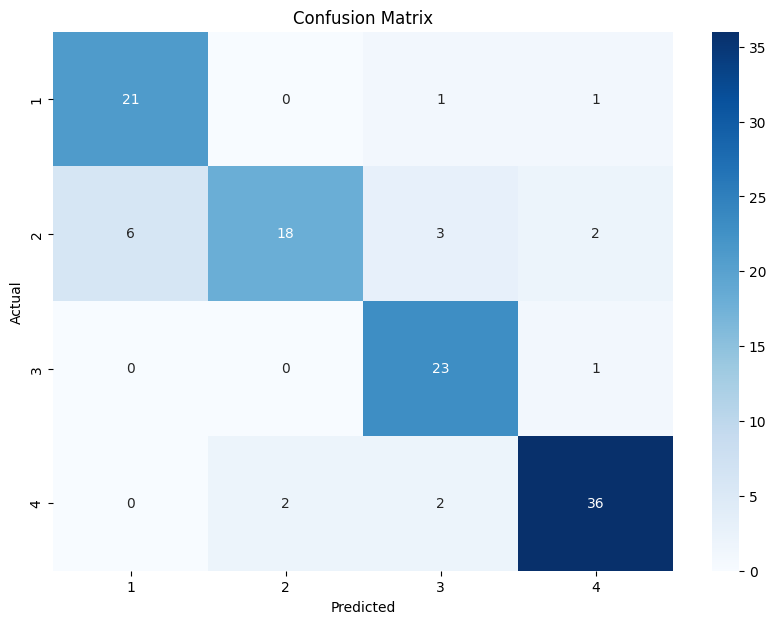

In [12]:
# Plot the confusion matrix

print("SVM Confusion Matrix:\n")
conf_matrix_knn = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **k-Nearest Neighbours (KNN)**

In [13]:
#Load KNN Classifier w/ no of neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the transformed X_train and y_train into model
knn.fit(X_train_pca, y_train)

# PREDICTION !!!
y_pred_knn = knn.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.6896551724137931


In [14]:
# Obtain classification report (accuracy, precision, recall, f1-score)

print("KNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:

              precision    recall  f1-score   support

           1       0.54      0.91      0.68        23
           2       1.00      0.28      0.43        29
           3       0.70      0.58      0.64        24
           4       0.76      0.93      0.83        40

    accuracy                           0.69       116
   macro avg       0.75      0.67      0.64       116
weighted avg       0.76      0.69      0.66       116



KNN Confusion Matrix:


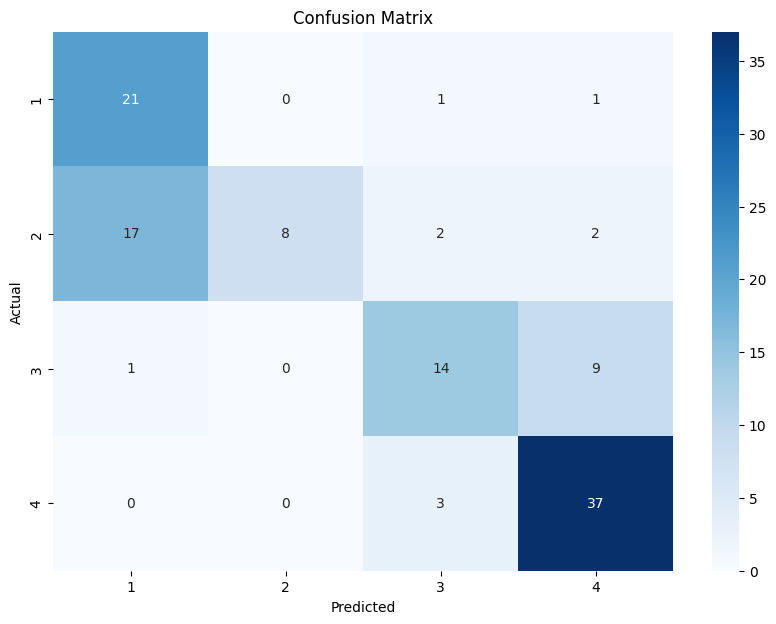

In [15]:
# Plot the confusion matrix

print("KNN Confusion Matrix:")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Export PCA and ML Models**

In [16]:
# Check if the folder exists, if not, create it
FOLDER_PATH = '../webapp/ml_models'
if not os.path.exists(FOLDER_PATH):
    os.makedirs(FOLDER_PATH)

# Dump PCA model into pca.pkl
with open(os.path.join(FOLDER_PATH, 'pca.pkl'), 'wb') as f:
    pickle.dump(pca, f)
    print("PCA has been exported into pca.pkl")

# Dump SVM model into svm.pkl
with open(os.path.join(FOLDER_PATH, 'svm.pkl'), 'wb') as f:
    pickle.dump(svm, f)
    print("SVM model has been exported into svm.pkl")

# Dump KNN model into knn.pkl
with open(os.path.join(FOLDER_PATH, 'knn.pkl'), 'wb') as f:
    pickle.dump(knn, f)
    print("KNN model has been exported into knn.pkl")

PCA has been exported into pca.pkl
SVM model has been exported into svm.pkl
KNN model has been exported into knn.pkl
